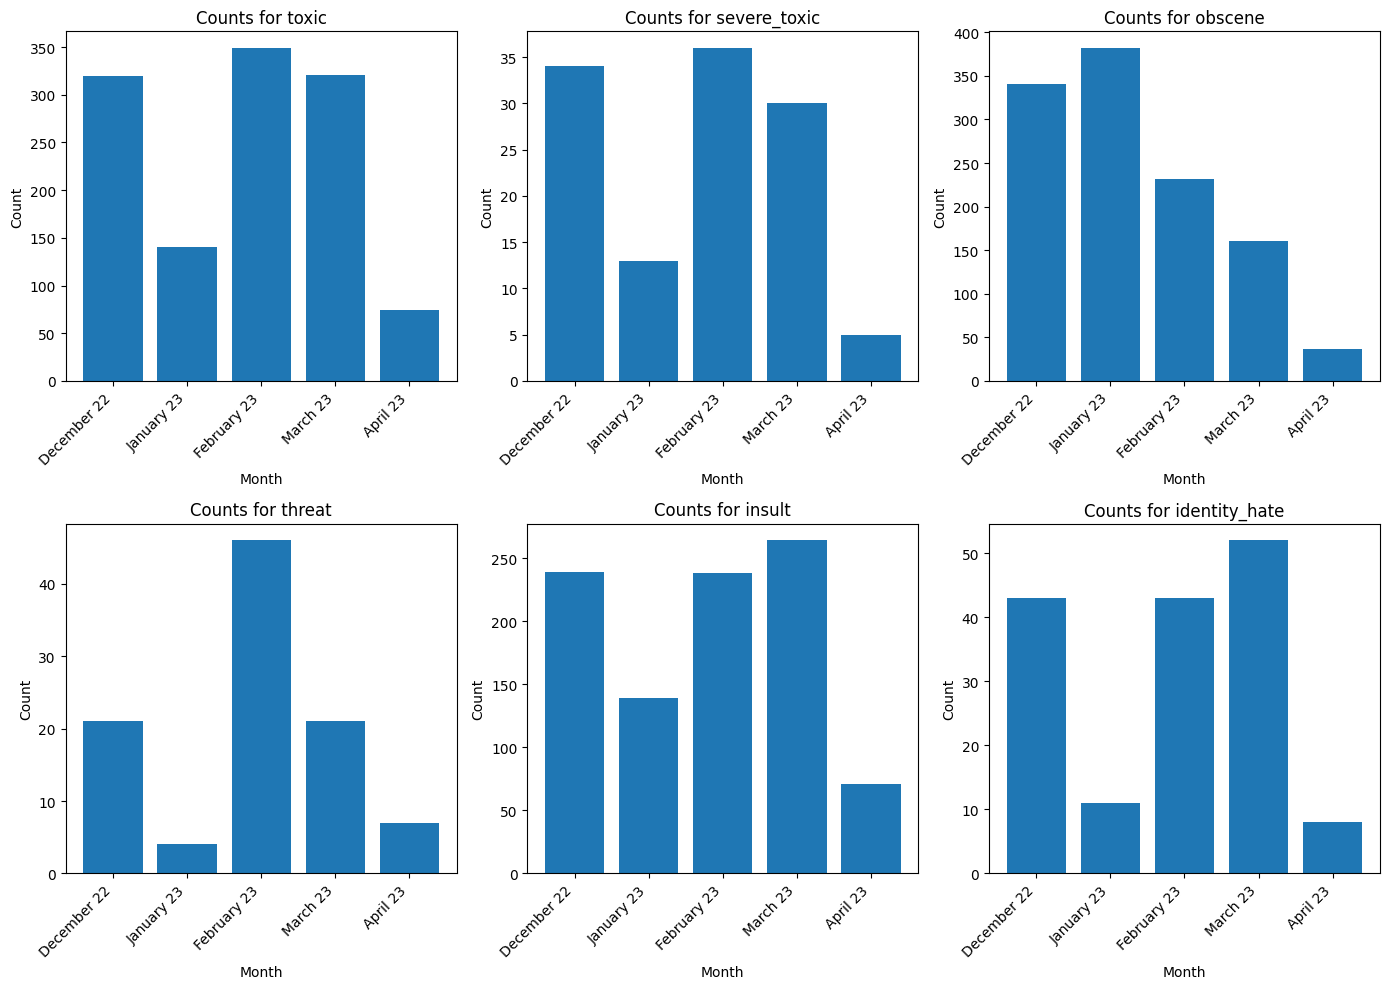

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_toxic_dataset.csv')

def count_unique_by_condition(df, column, condition_column, condition_value):
    filtered_df = df[df[condition_column] == condition_value]
    return filtered_df[column].value_counts()

# Define the columns to analyze
columns_to_analyze = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

month_mapping = {
    'December': 'December 22',
    'March': 'January 23',
    'April': 'February 23',
    'May': 'March 23',
    'June': 'April 23'
}

df['month'] = df['month'].map(month_mapping).fillna(df['month'])
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
for i, column in enumerate(columns_to_analyze):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    unique_counts = count_unique_by_condition(df, 'month', column, 1)
    ordered_months = ['December 22', 'January 23', 'February 23', 'March 23', 'April 23']
    unique_counts = unique_counts.reindex(ordered_months).fillna(0) 
    ax.bar(ordered_months, unique_counts, align='center')
    ax.set_title(f'Counts for {column}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')
    ax.grid(False) 
    ax.set_xticks(range(len(ordered_months))) 
    ax.set_xticklabels(ordered_months, rotation=45, ha='right') 

plt.tight_layout()
plt.savefig('toxicity_counts_aligned.png')
plt.show()
